In [1]:
laptop = True

if laptop:
    rootF = 'C:/Users/goethas/'
else:
    rootF = '/home/sarah/'

In [2]:
import os as os
import sys
import numpy as np
import cv2
import csv

from numpy import *
from scipy.stats import linregress
from scipy.signal import correlate
import pickle as pickle
import pandas as pd
from tqdm.auto import tqdm

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from shared.save_load import *

In [3]:
exp = 20230105

# Experiment conditions
if exp in [19, 20211022, 20211103]:
    from shared.parameters_stimulation1 import *
elif exp in [20211129, 20211207, 20211208, 20220224, 20221213, 20221214, 20230105]:
    from shared.parameters_stimulation2 import *
    pixel_size_um = 3.5
    pixel_per_check = 12
    nb_checks = 60

# Load data

In [4]:
data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

### Spike counts

In [5]:
blur_data = load(data_path + str(exp) + '_selected_cells_spike_count_with_noise.npz')

spike_counts = blur_data['spike_count']
spike_counts_mean = blur_data['spike_count_mean']
spike_counts_std = blur_data['spike_count_std']
clusters = blur_data['clusters']

Ncells = len(clusters)

print (shape(spike_counts))

(188, 4, 2, 9, 4, 25)


In [6]:
# from code: "2_Select_clusters_makeSTA.ipynb"

cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

data_clusters = list(cell_data.keys())

data_clusters

['5',
 '6',
 '8',
 '10',
 '13',
 '15',
 '18',
 '31',
 '32',
 '33',
 '34',
 '40',
 '45',
 '47',
 '48',
 '50',
 '52',
 '54',
 '56',
 '57',
 '58',
 '61',
 '64',
 '72',
 '81',
 '85',
 '89',
 '96',
 '106',
 '108',
 '112',
 '113',
 '116',
 '117',
 '119',
 '120',
 '122',
 '124',
 '125',
 '126',
 '128',
 '134',
 '137',
 '141',
 '148',
 '151',
 '152',
 '160',
 '165',
 '169',
 '171',
 '172',
 '175',
 '177',
 '178',
 '201',
 '204',
 '207',
 '215',
 '218',
 '221',
 '224',
 '230',
 '233',
 '235',
 '238',
 '239',
 '240',
 '243',
 '244',
 '246',
 '248',
 '255',
 '259',
 '260',
 '264',
 '265',
 '266',
 '268',
 '269',
 '271',
 '272',
 '273',
 '274',
 '275',
 '279',
 '281',
 '282',
 '284',
 '286',
 '288',
 '289',
 '290',
 '292',
 '294',
 '295',
 '297',
 '299',
 '301',
 '304',
 '306',
 '307',
 '308',
 '309',
 '310',
 '311',
 '312',
 '320',
 '325',
 '326',
 '329',
 '330',
 '332',
 '334',
 '337',
 '345',
 '347',
 '349',
 '350',
 '353',
 '355',
 '356',
 '359',
 '368',
 '374',
 '375',
 '379',
 '381',
 '385',

### Baden types

In [12]:
# Load Baden types
exp_path = rootF + '/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

# Load cells
cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering_clus14')
cells_clustering = array(cells_clustering)
cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden')

# Attribute its type to each selected cell
selected_cells_type = np.zeros((Ncells))
for i, cell in enumerate(clusters):
    idx_cell = where(cells_clustering == cell)
    if len(idx_cell[0]) > 0:
        selected_cells_type[i] = int(cell_types[idx_cell[0][0]])
        print (cell, cells_clustering[idx_cell], cell_types[idx_cell[0][0]])
    else:
        print(cell, 'no type')

5 [5] 26.0
8 [8] 20.0
13 [13] 11.0
15 [15] 2.0
18 [18] 28.0
33 no type
47 [47] 27.0
48 [48] 31.0
50 no type
50 no type
54 [54] 12.0
64 no type
89 [89] 11.0
96 [96] 4.0
116 no type
117 [117] 22.0
120 no type
122 [122] 22.0
125 no type
134 [134] 2.0
137 [137] 28.0
141 [141] 11.0
148 [148] 9.0
152 [152] 14.0
160 [160] 27.0
169 [169] 24.0
171 no type
177 [177] 26.0
178 no type
201 [201] 2.0
207 no type
215 [215] 23.0
218 [218] 20.0
221 [221] 31.0
230 [230] 20.0
233 [233] 11.0
240 [240] 22.0
246 no type
248 [248] 22.0
255 [255] 12.0
268 no type
269 [269] 31.0
271 [271] 31.0
272 [272] 7.0
273 [273] 23.0
274 [274] 27.0
281 [281] 2.0
282 [282] 2.0
284 [284] 16.0
289 no type
295 [295] 26.0
297 no type
301 [301] 24.0
307 no type
308 [308] 12.0
311 [311] 30.0
320 [320] 2.0
326 [326] 14.0
329 [329] 26.0
330 [330] 4.0
334 no type
337 no type
345 [345] 9.0
347 [347] 31.0
350 no type
353 no type
355 [355] 2.0
356 [356] 23.0
368 [368] 0.0
374 no type
379 no type
385 no type
389 [389] 14.0
394 [394] 25

In [8]:
cell_types

array([26., 20., 11.,  2., 28., 27., 31., 12., 11.,  4., 22., 22.,  2.,
       28., 11.,  9., 14., 27., 24., 26.,  2., 23., 20., 31., 20., 11.,
       22., 22., 12., 31., 31.,  7., 23., 27.,  2.,  2., 16., 26., 24.,
       12., 30.,  2., 14., 26.,  4.,  9., 31.,  2., 23.,  0., 14., 25.,
       27.,  0., 22., 16., 12.,  9.,  2., 31.,  2., 14., 28.,  2.,  2.,
       20.,  2., 23.,  7., 19., 12.,  4., 31.,  7.,  0., 27.,  2., 28.,
        0., 27., 22.,  0., 31.,  2., 23., 22.,  1., 24., 23., 23., 23.,
       23., 23.,  4., 23., 26., 26., 23., 23., 23.,  4.,  4., 23., 23.,
        7., 24., 24., 10.,  9.,  9., 12., 25., 25.,  2., 19., 26.,  9.,
       27.,  1., 20., 25.,  2., 31., 11., 25., 14., 28.,  1., 11., 12.,
        7., 30., 10., 31., 12., 19., 11., 16., 28., 31., 12., 12., 11.])

In [9]:
Folder = rootF + '/Documents/Myopia/Data analysis/calcium_comparison/'

euler_labels_f = open(Folder + 'Baden Types');
euler_labels_f = csv.reader(euler_labels_f,delimiter=",");
euler_labels={}
c=0
for row in euler_labels_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        euler_labels[c-1]= row
        c+=1     

# euler_labels

In [10]:
euler_label_names = []

for i in range(len(euler_labels)):
    euler_label_names.append(euler_labels[i][0])

# Cross-corr to check cells in a type

In [20]:
# Cell 998 is an ON DS sustained 3
cell_nb = 998
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 28

# Cell 510 is an ON transient
cell_nb = 510
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 17

# Cell 248 is an ON transient
cell_nb = 248
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 17

# Cell 404 is an ON transient
cell_nb = 404
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 17

OFF local OS : [368 398 557 569 578]
[0.69066177 0.73863928 0.76440337 0.68493454]
[0.69066177 0.83664866 0.61305572 0.81234811]
[0.73863928 0.83664866 0.60148441 0.84285944]
[0.76440337 0.61305572 0.60148441 0.59283319]
[0.68493454 0.81234811 0.84285944 0.59283319]


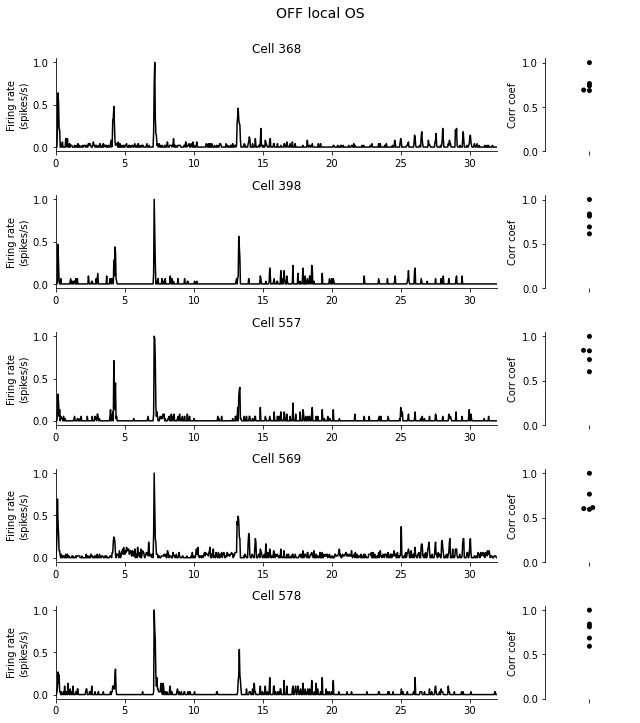

OFF DS : [589 923 957]
[0.27005855 0.33133762]
[0.27005855 0.39579063]
[0.33133762 0.39579063]


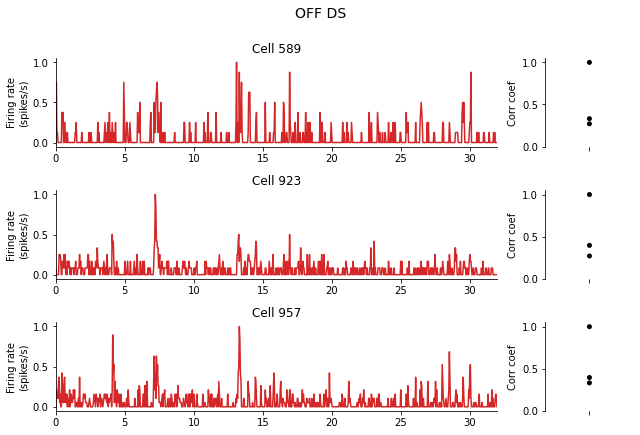

OFF step : [ 15 134 201 281 282 320 355 420 424 454 462 482 562 583 880 936]
[0.30534856 0.45386173 0.43395673 0.36521331 0.42104244 0.31121852
 0.31748919 0.39404213 0.44986058 0.37942417 0.3180446  0.39514184
 0.41424554 0.45008604 0.30370913]
[0.30534856 0.65208478 0.61024298 0.57714707 0.40951059 0.32603056
 0.38212547 0.54442783 0.51136366 0.61221786 0.62921123 0.47987374
 0.50673822 0.56140845 0.50698979]
[0.45386173 0.65208478 0.76859758 0.7565756  0.53957931 0.49203656
 0.56816566 0.75872368 0.7183518  0.72277645 0.64063164 0.68046694
 0.67130576 0.7693738  0.67770382]
[0.43395673 0.61024298 0.76859758 0.85110162 0.43369461 0.44553517
 0.66883705 0.79794749 0.73431146 0.70262185 0.69245218 0.75925304
 0.77476514 0.78950033 0.64285564]
[0.36521331 0.57714707 0.7565756  0.85110162 0.44235553 0.38645744
 0.6230228  0.71764704 0.72321748 0.77525113 0.69554382 0.67042065
 0.6718367  0.72038987 0.65442162]
[0.42104244 0.40951059 0.53957931 0.43369461 0.44235553 0.21251506
 0.21703158

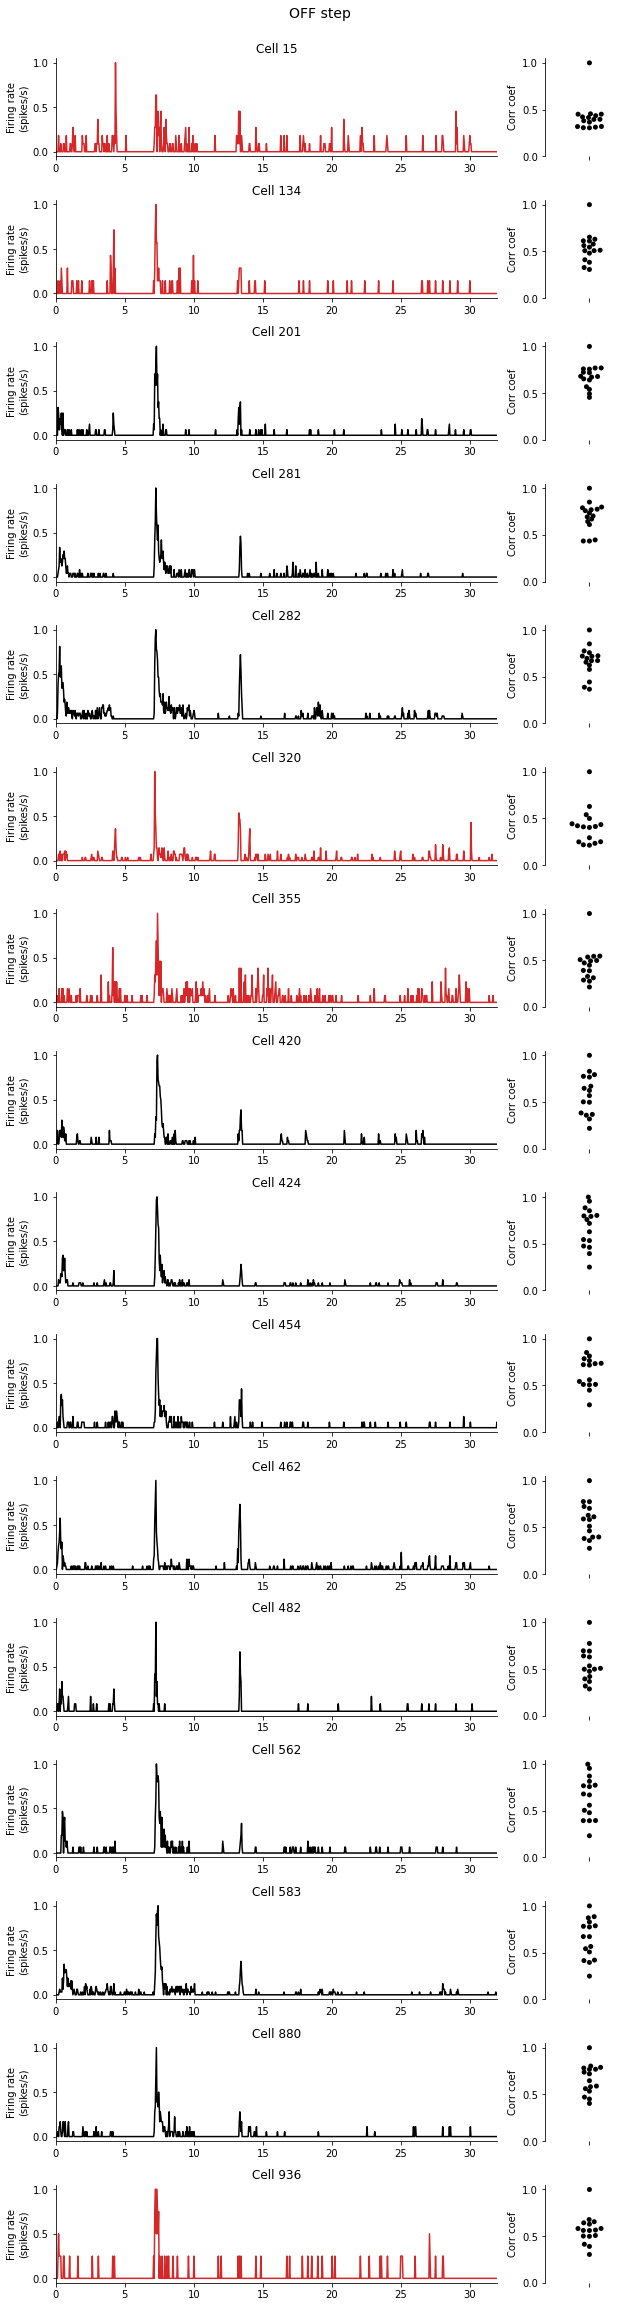

OFF alpha sustained : [ 96 330 550 642 733 741]
[0.7740851  0.7915332  0.76591462 0.59921129 0.66731448]
[0.7740851  0.89775848 0.83782396 0.65632594 0.82148041]
[0.7915332  0.89775848 0.95550731 0.75720633 0.85005368]
[0.76591462 0.83782396 0.95550731 0.78359115 0.84419778]
[0.59921129 0.65632594 0.75720633 0.78359115 0.76691577]
[0.66731448 0.82148041 0.85005368 0.84419778 0.76691577]


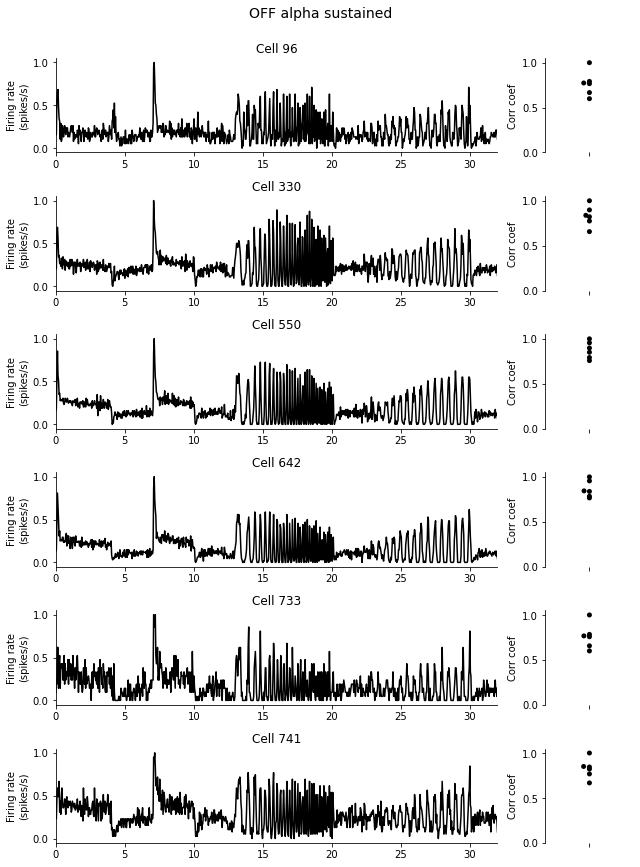

OFF alpha transient : [272 508 556 765 966]
[0.77451142 0.66053419 0.76000133 0.62081519]
[0.77451142 0.68769108 0.74441428 0.68063296]
[0.66053419 0.68769108 0.60576895 0.5230373 ]
[0.76000133 0.74441428 0.60576895 0.50269185]
[0.62081519 0.68063296 0.5230373  0.50269185]


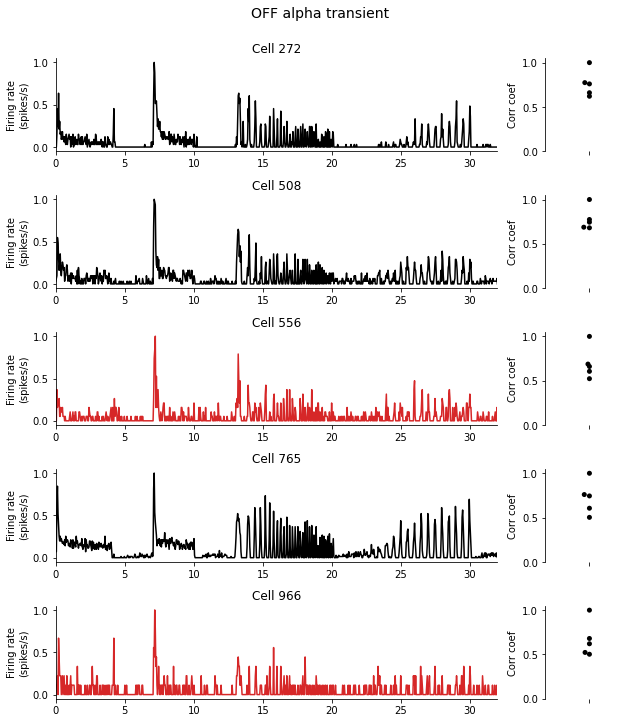

ON-OFF local-edge W3 : [148 345 415 817 829 906]
[0.48834408 0.39183849 0.48716799 0.553504   0.51179354]
[0.48834408 0.51180861 0.62741237 0.86675537 0.18583067]
[0.39183849 0.51180861 0.50046274 0.52543513 0.20324315]
[0.48716799 0.62741237 0.50046274 0.58259318 0.27352972]
[0.553504   0.86675537 0.52543513 0.58259318 0.26486446]
[0.51179354 0.18583067 0.20324315 0.27352972 0.26486446]


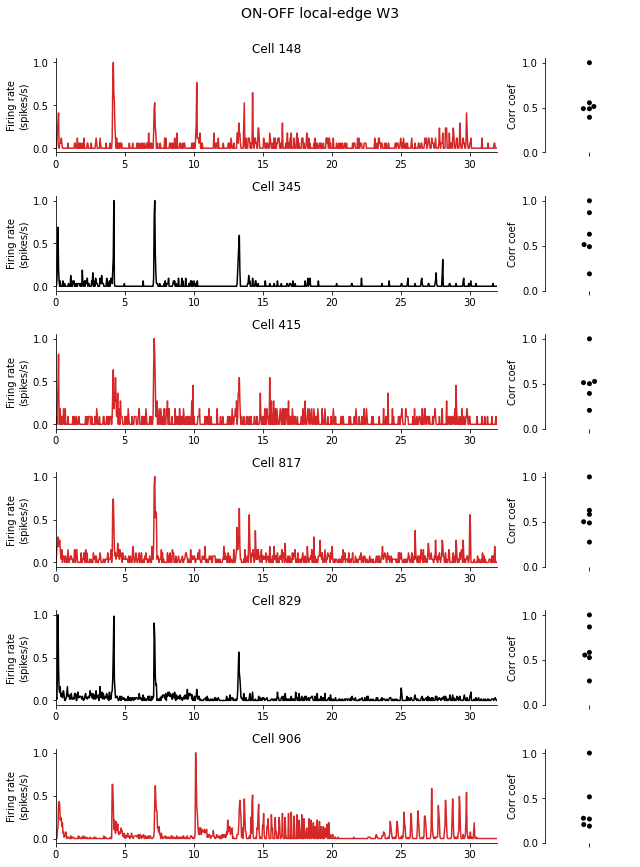

ON-OFF local : [798 975]
[0.5710209]
[0.5710209]


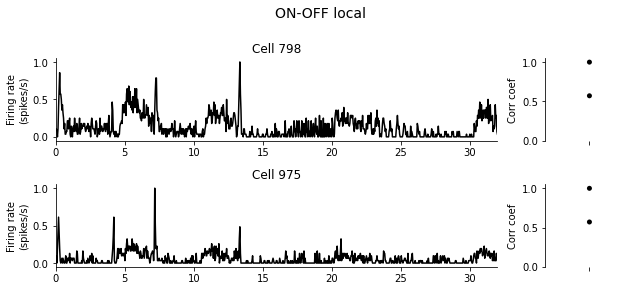

ON-OFF DS 1 : [  13   89  141  233  943  962  990 1039]
[0.87525239 0.58700758 0.51443812 0.56305451 0.92490212 0.84457873
 0.45594505]
[0.87525239 0.66896842 0.56700387 0.62240281 0.81706304 0.79714896
 0.54414747]
[0.58700758 0.66896842 0.8263887  0.75871965 0.56351728 0.59644414
 0.82679039]
[0.51443812 0.56700387 0.8263887  0.6309087  0.49986166 0.51859159
 0.70739401]
[0.56305451 0.62240281 0.75871965 0.6309087  0.53535009 0.53534674
 0.84794906]
[0.92490212 0.81706304 0.56351728 0.49986166 0.53535009 0.86669832
 0.43837202]
[0.84457873 0.79714896 0.59644414 0.51859159 0.53534674 0.86669832
 0.4418907 ]
[0.45594505 0.54414747 0.82679039 0.70739401 0.84794906 0.43837202
 0.4418907 ]


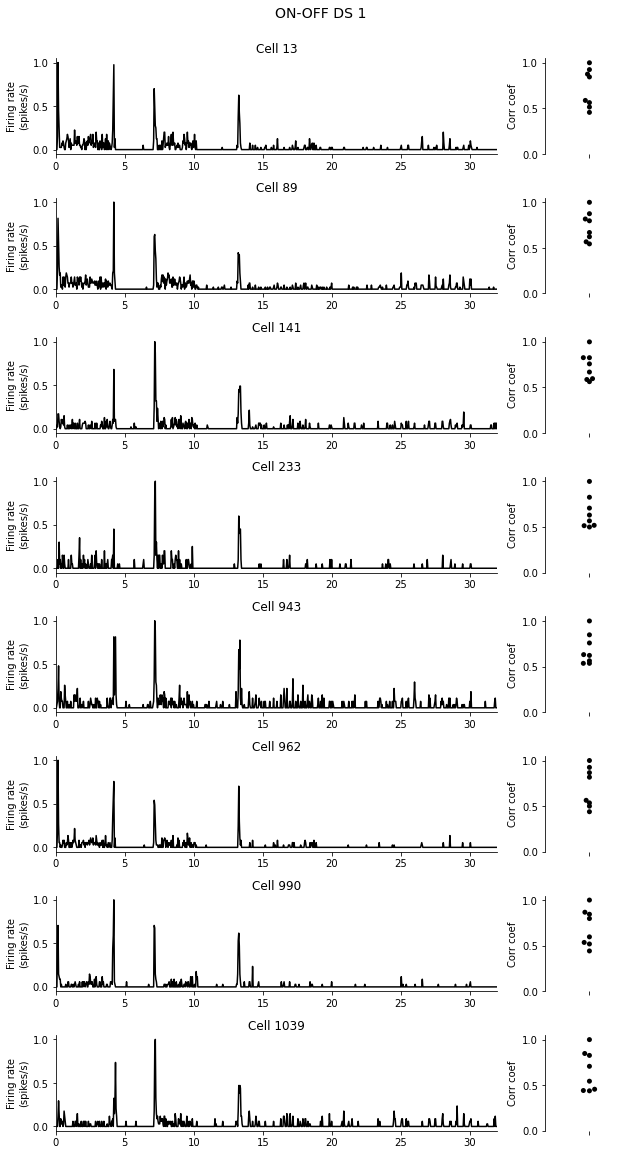

ON-OFF DS 2 : [  54  255  308  410  540  832  964  979 1018 1030]
[0.67707158 0.5933165  0.24606733 0.08899162 0.36963012 0.54403063
 0.47344123 0.72108135 0.52881861]
[0.67707158 0.65974609 0.25833335 0.07210842 0.33984699 0.68993349
 0.58651243 0.82245971 0.63286304]
[ 0.5933165   0.65974609  0.25995966 -0.01702375  0.32316449  0.56956361
  0.51238001  0.76585507  0.66848717]
[0.24606733 0.25833335 0.25995966 0.19615056 0.26576797 0.3072946
 0.28440039 0.27691049 0.31391418]
[ 0.08899162  0.07210842 -0.01702375  0.19615056  0.03991198  0.06681854
  0.09913912  0.08787671  0.06879878]
[0.36963012 0.33984699 0.32316449 0.26576797 0.03991198 0.23895892
 0.20240333 0.40355774 0.18878433]
[0.54403063 0.68993349 0.56956361 0.3072946  0.06681854 0.23895892
 0.5934772  0.68731536 0.58069535]
[0.47344123 0.58651243 0.51238001 0.28440039 0.09913912 0.20240333
 0.5934772  0.56639185 0.54019822]
[0.72108135 0.82245971 0.76585507 0.27691049 0.08787671 0.40355774
 0.68731536 0.56639185 0.6961926 ]

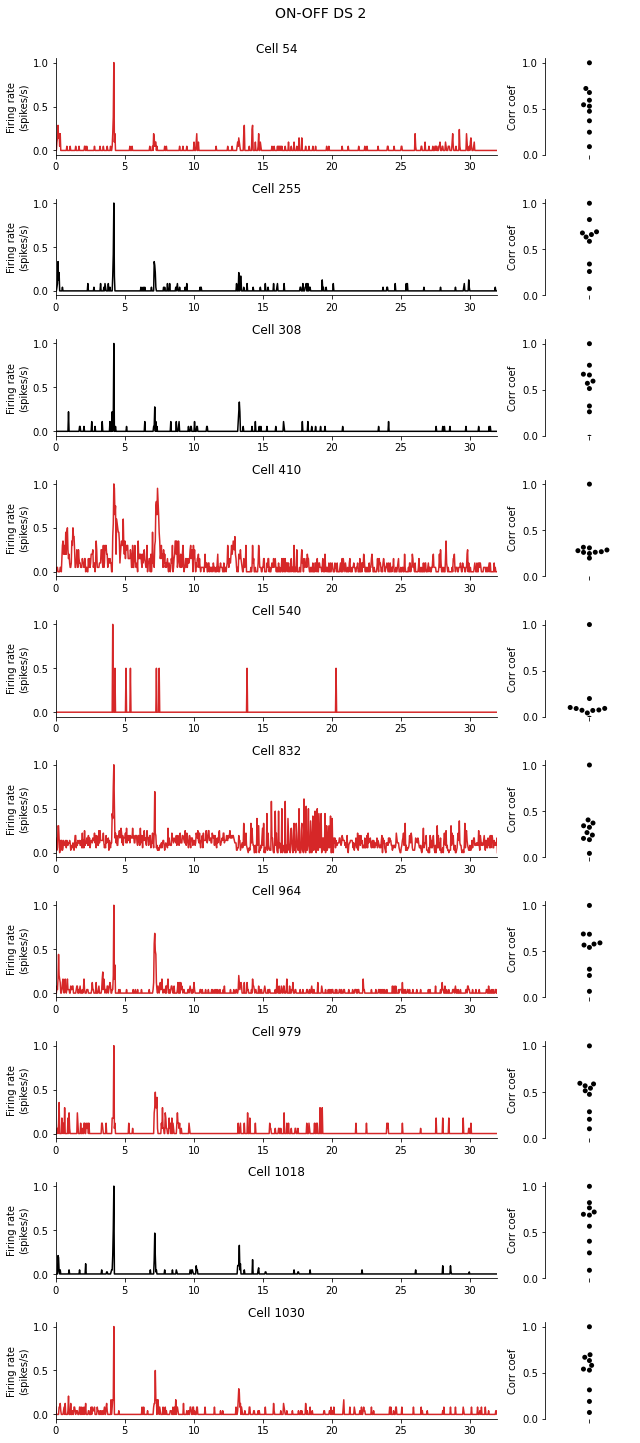

ON step : [152 326 389 425 947]
[0.78768113 0.77888948 0.89670927 0.80345363]
[0.78768113 0.67339528 0.79114317 0.81099901]
[0.77888948 0.67339528 0.85037378 0.64638773]
[0.89670927 0.79114317 0.85037378 0.73399268]
[0.80345363 0.81099901 0.64638773 0.73399268]


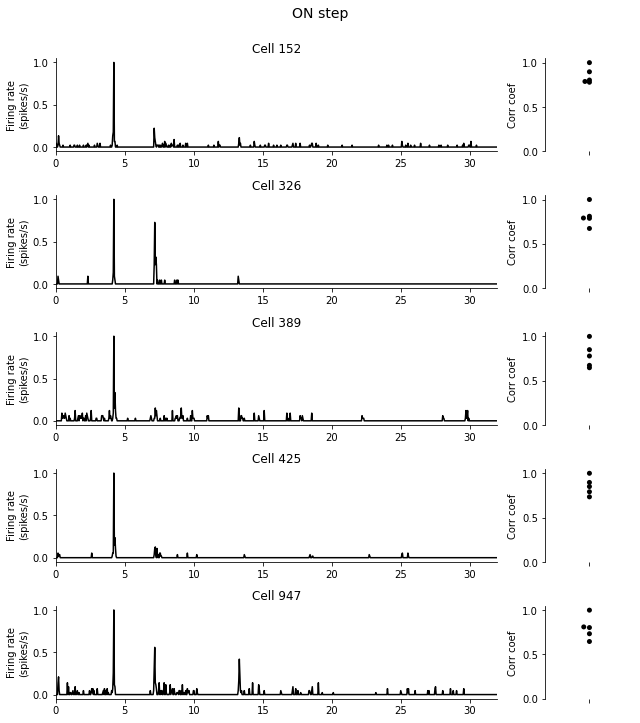

ON local transient OS : [284 406]
[0.85564789]
[0.85564789]


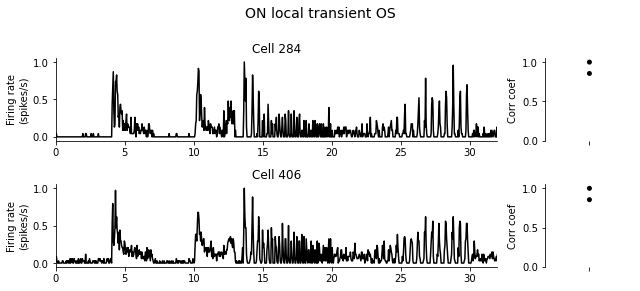

ON transient : [248 404 510]
[0.85585328 0.55484006]
[0.85585328 0.68476521]
[0.55484006 0.68476521]


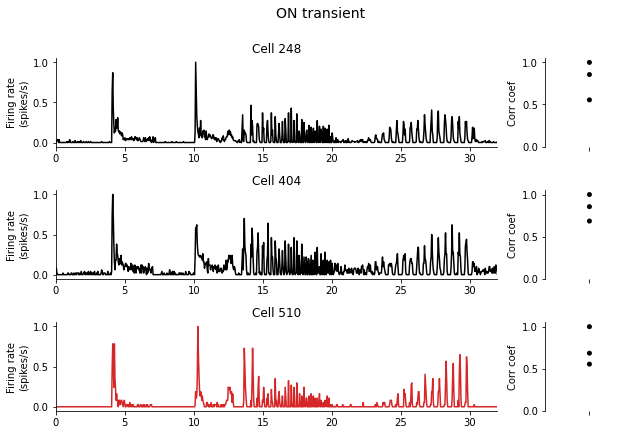

ON high frequency : [900 982]
[0.80858368]
[0.80858368]


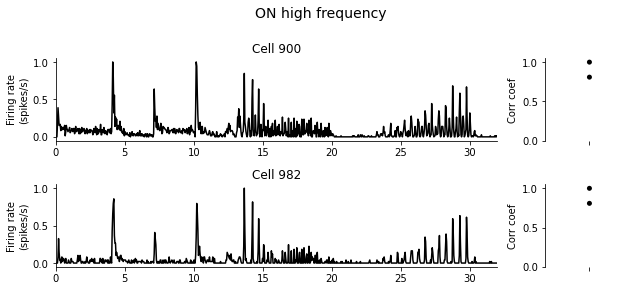

ON low frequency : [  8 218 230 469 928]
[0.67190637 0.8773345  0.71107338 0.65984731]
[0.67190637 0.60402593 0.73500172 0.66820049]
[0.8773345  0.60402593 0.73728707 0.50803802]
[0.71107338 0.73500172 0.73728707 0.56368844]
[0.65984731 0.66820049 0.50803802 0.56368844]


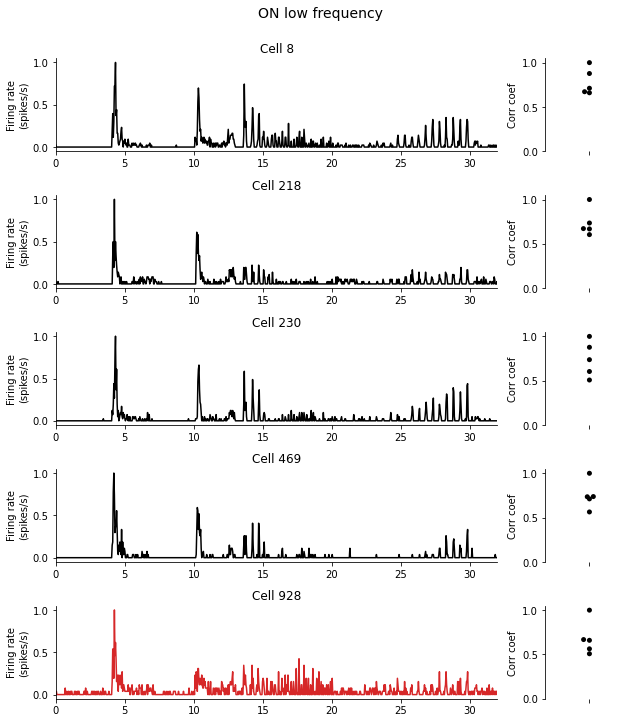

ON mini alpha : [117 122 240 577 586]
[0.68684904 0.96313933 0.7473839  0.62006896]
[0.68684904 0.67440597 0.64882253 0.56584519]
[0.96313933 0.67440597 0.72722924 0.5910455 ]
[0.7473839  0.64882253 0.72722924 0.55954939]
[0.62006896 0.56584519 0.5910455  0.55954939]


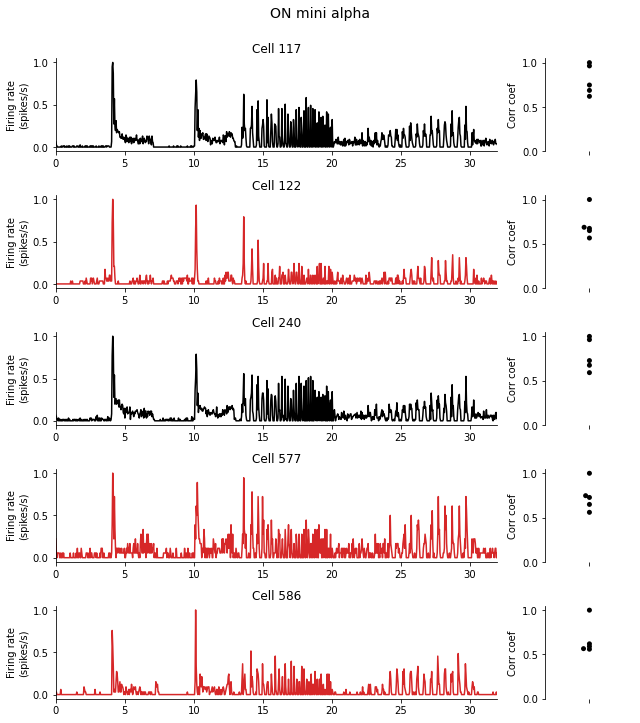

ON alpha : [215 273 356 498 585 596 598 600 609 620 657 700 704 719 744 759]
[0.69351258 0.69417467 0.69944576 0.81017485 0.73811711 0.78317442
 0.7162634  0.78202478 0.82760854 0.67326035 0.71322134 0.7071086
 0.82170515 0.72352563 0.59738004]
[0.69351258 0.75844525 0.6820616  0.83479056 0.84524341 0.85367811
 0.82006527 0.85068225 0.7976789  0.69632892 0.78130028 0.79650837
 0.72582898 0.77436117 0.70312885]
[0.69417467 0.75844525 0.71966241 0.83186461 0.83889943 0.83106517
 0.7171949  0.84005684 0.83576511 0.79964723 0.8398156  0.85496588
 0.81033072 0.72992693 0.73263158]
[0.69944576 0.6820616  0.71966241 0.78339573 0.82039151 0.81181107
 0.68184375 0.80994285 0.82178801 0.73660319 0.76981932 0.74682764
 0.77992321 0.6868573  0.74049538]
[0.81017485 0.83479056 0.83186461 0.78339573 0.89673056 0.90803426
 0.81905455 0.89948915 0.93084939 0.82923407 0.90152696 0.88687545
 0.90088058 0.84401081 0.77106544]
[0.73811711 0.84524341 0.83889943 0.82039151 0.89673056 0.93342977
 0.80924307 

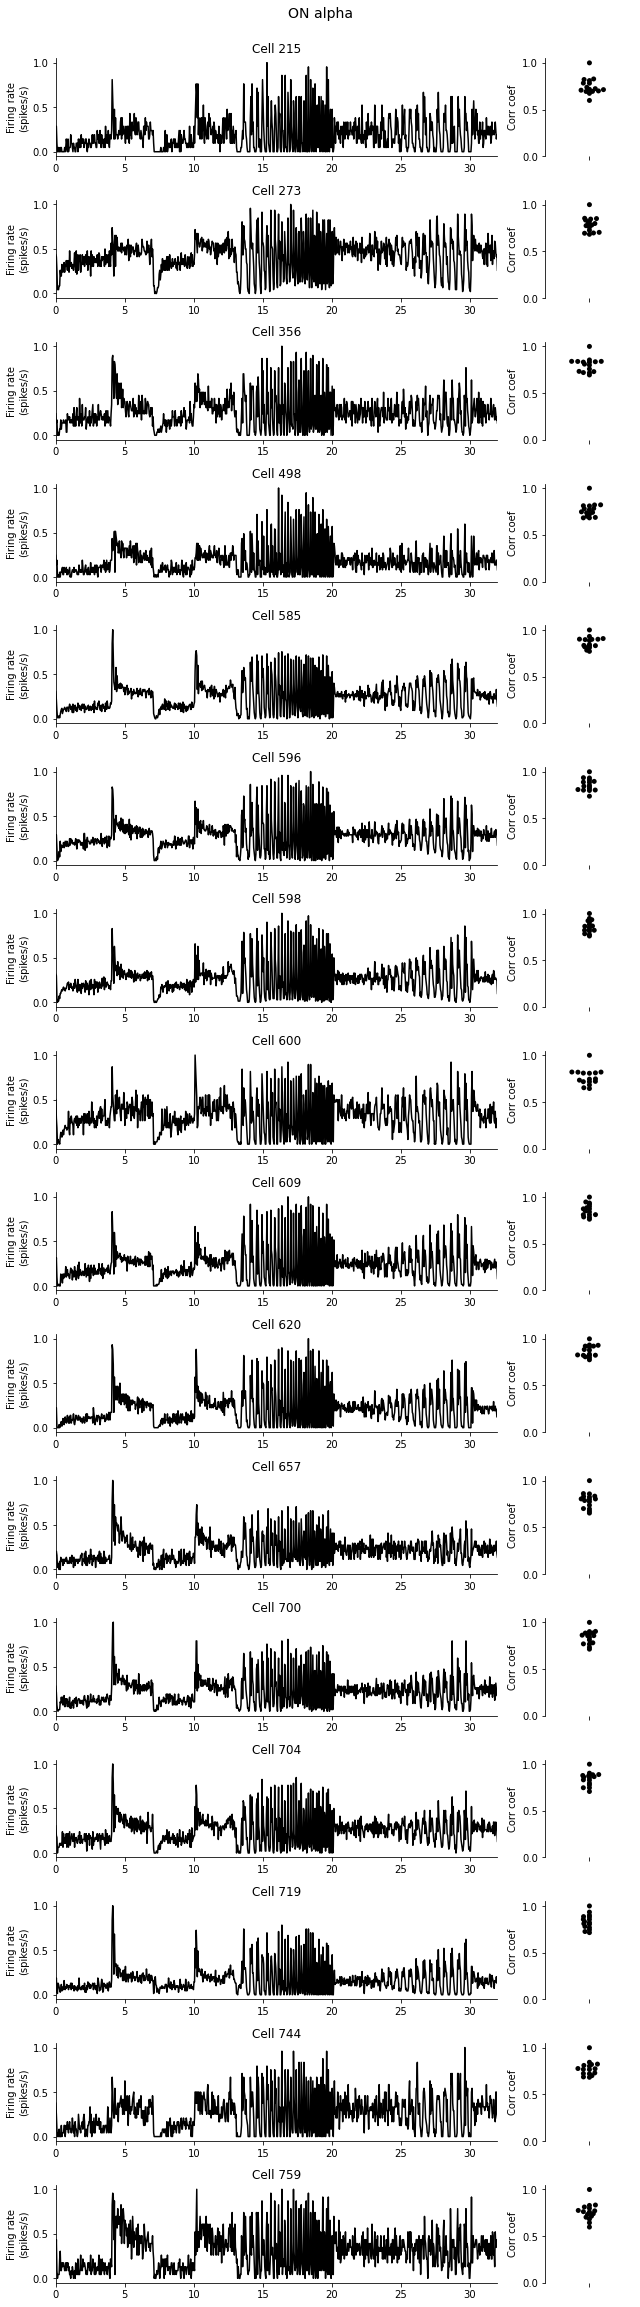

ON DS sustained 1 : [169 301 590 777 791]
[0.80916685 0.78339841 0.69712115 0.74844408]
[0.80916685 0.80655166 0.73015865 0.79300465]
[0.78339841 0.80655166 0.78324519 0.84045677]
[0.69712115 0.73015865 0.78324519 0.79211815]
[0.74844408 0.79300465 0.84045677 0.79211815]


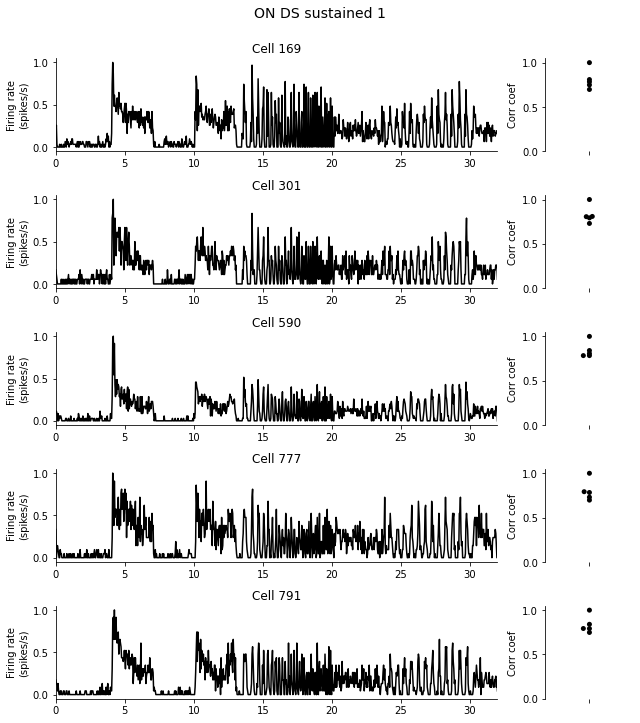

ON DS sustained 2 : [394 856 878 929 944]
[0.73177424 0.47823382 0.67740316 0.46660567]
[0.73177424 0.4620586  0.72511046 0.53410354]
[0.47823382 0.4620586  0.5535446  0.22140805]
[0.67740316 0.72511046 0.5535446  0.38190934]
[0.46660567 0.53410354 0.22140805 0.38190934]


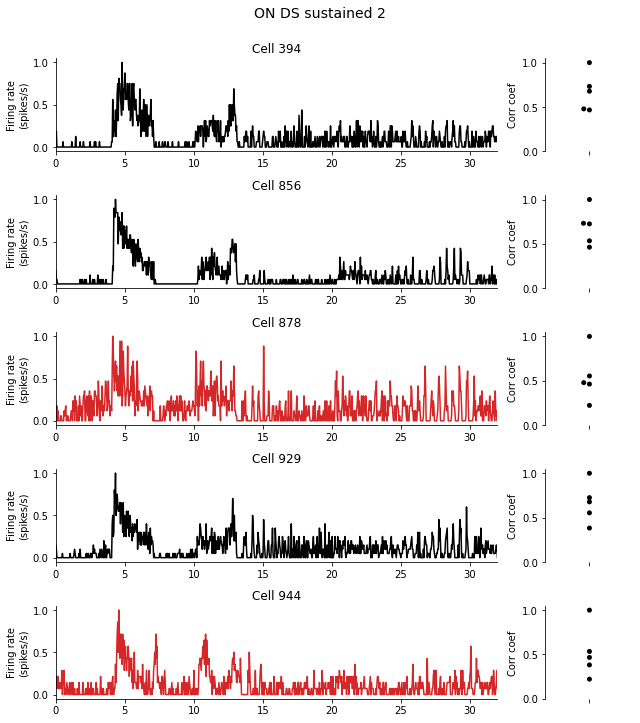

ON slow : [  5 177 295 329 663 689 903]
[0.12451606 0.46534279 0.17665255 0.5339596  0.73062686 0.06285149]
[0.12451606 0.47786377 0.50186385 0.29500468 0.31488659 0.51456635]
[0.46534279 0.47786377 0.28870746 0.49020483 0.53617019 0.332943  ]
[0.17665255 0.50186385 0.28870746 0.34255459 0.32746438 0.41513969]
[0.5339596  0.29500468 0.49020483 0.34255459 0.66668006 0.20452449]
[0.73062686 0.31488659 0.53617019 0.32746438 0.66668006 0.20608617]
[0.06285149 0.51456635 0.332943   0.41513969 0.20452449 0.20608617]


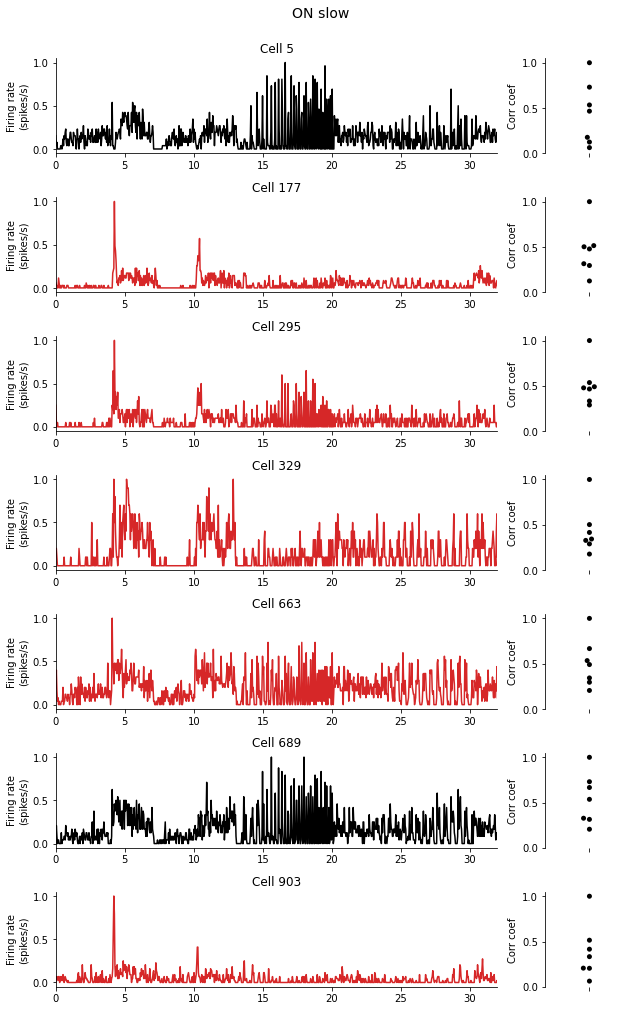

ON constrast suppression : [ 47 160 274 396 558 571 921]
[0.68399411 0.55582302 0.59042951 0.51861238 0.56532954 0.57845824]
[0.68399411 0.60941359 0.57237431 0.57446572 0.63950489 0.63857699]
[0.55582302 0.60941359 0.65029684 0.69819871 0.70371552 0.73942292]
[0.59042951 0.57237431 0.65029684 0.56691209 0.70167708 0.7182491 ]
[0.51861238 0.57446572 0.69819871 0.56691209 0.67902537 0.62521788]
[0.56532954 0.63950489 0.70371552 0.70167708 0.67902537 0.76203476]
[0.57845824 0.63857699 0.73942292 0.7182491  0.62521788 0.76203476]


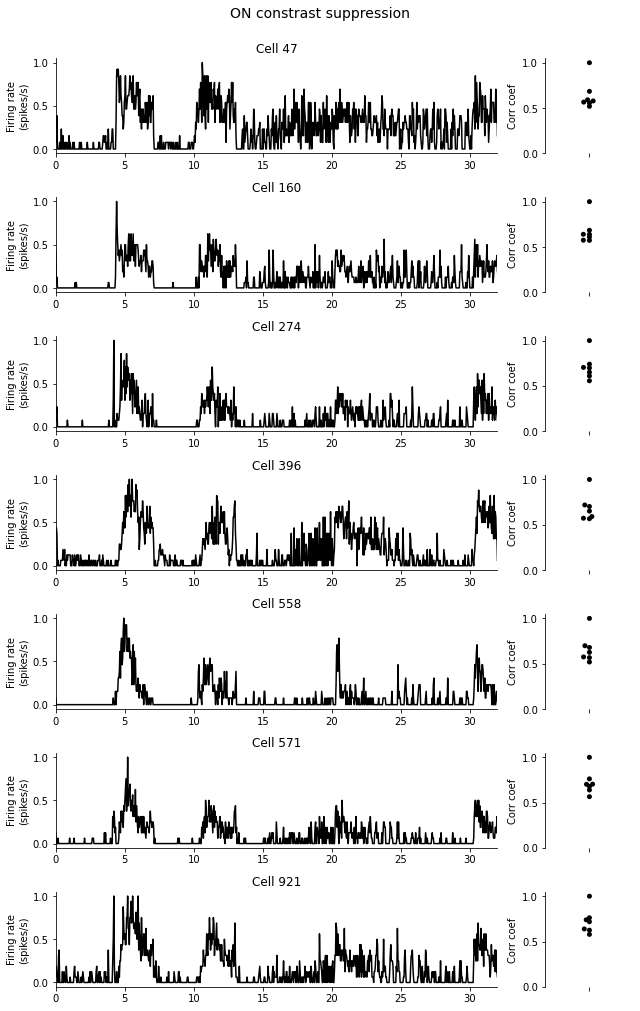

ON DS sustained 3 : [  18  137  451  565  951  998 1005]
[0.69080356 0.86584743 0.83017018 0.78736926 0.41337608 0.68419272]
[0.69080356 0.82611069 0.82510001 0.83424216 0.63042756 0.86880569]
[0.86584743 0.82611069 0.88331357 0.89945049 0.60497256 0.7735968 ]
[0.83017018 0.82510001 0.88331357 0.81841353 0.51786641 0.79180566]
[0.78736926 0.83424216 0.89945049 0.81841353 0.64654561 0.7609009 ]
[0.41337608 0.63042756 0.60497256 0.51786641 0.64654561 0.57181346]
[0.68419272 0.86880569 0.7735968  0.79180566 0.7609009  0.57181346]


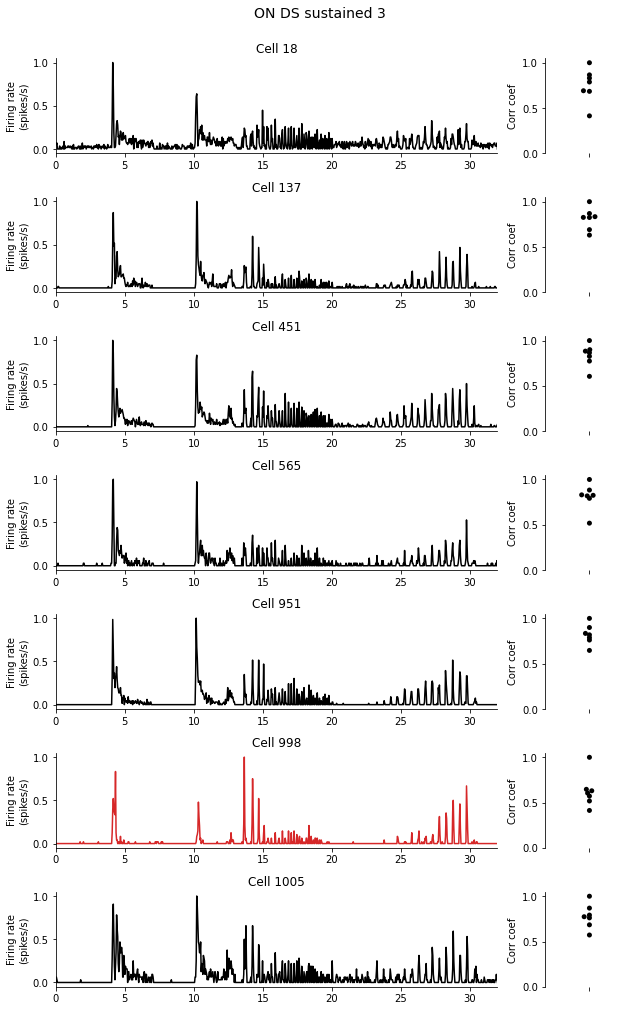

OFF suppression 1 : [311 970]
[0.61033635]
[0.61033635]


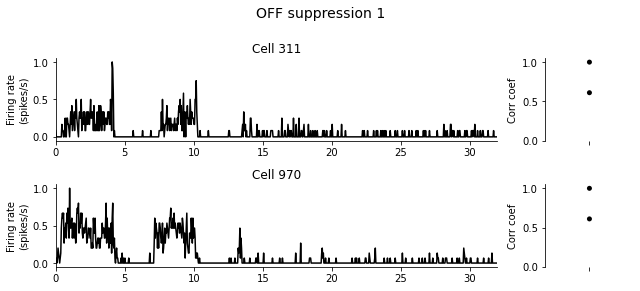

OFF suppression 2 : [  48  221  269  271  347  422  553  580  937  976 1010]
[0.31579369 0.56656519 0.48662948 0.53159446 0.30217493 0.45254514
 0.5132863  0.5089966  0.38387561 0.49762257]
[0.31579369 0.43990719 0.63413541 0.64158189 0.17309711 0.33018349
 0.71981799 0.69393404 0.59197662 0.4238668 ]
[0.56656519 0.43990719 0.68461343 0.64679666 0.35730978 0.58822257
 0.63747724 0.6077367  0.4618956  0.69850104]
[0.48662948 0.63413541 0.68461343 0.85374539 0.49492427 0.52295108
 0.88931685 0.88410332 0.52937576 0.62556516]
[0.53159446 0.64158189 0.64679666 0.85374539 0.44922958 0.53136198
 0.88285003 0.90111089 0.60141784 0.60924373]
[0.30217493 0.17309711 0.35730978 0.49492427 0.44922958 0.28716285
 0.40138421 0.43036682 0.15703159 0.30260843]
[0.45254514 0.33018349 0.58822257 0.52295108 0.53136198 0.28716285
 0.54772953 0.5074564  0.43880345 0.52763003]
[0.5132863  0.71981799 0.63747724 0.88931685 0.88285003 0.40138421
 0.54772953 0.91502877 0.63528153 0.61732506]
[0.5089966  0.69393

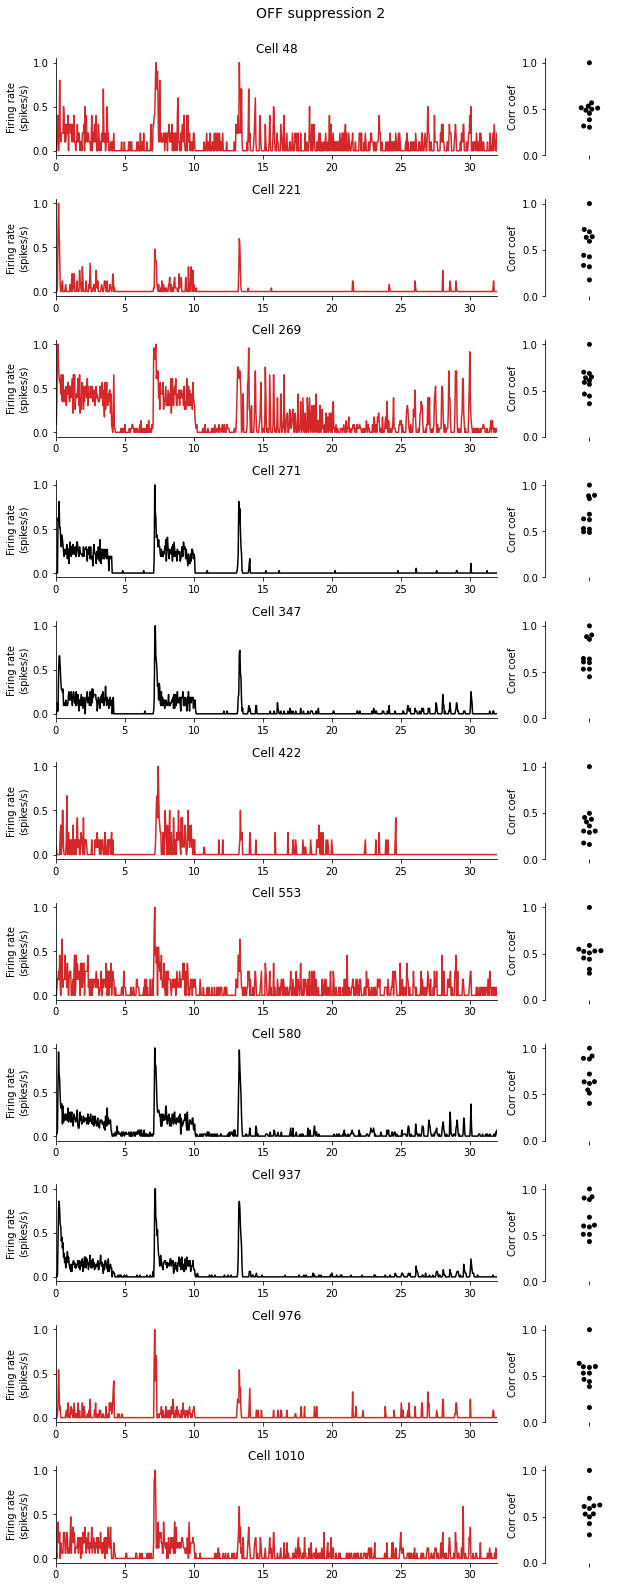

In [27]:
cell_types_cleaned = np.copy(cell_types)
# euler_labels_cleaning = zeros(len(euler_labels)) # 0: present but not cleaned type not present, 1: , 2: cleaned

baseline_len = 4 # sec
dt = 0.04 # sec
baseline_end = int(baseline_len / dt)

for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(9, 2.5))
        else:
            fig = plt.figure(figsize=(9, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 2, width_ratios = [5,1])

        cross_corrs = np.zeros((len(selected_cells), len(selected_cells)))
        
        removed_cells = []

        for i, cell_nb in enumerate(selected_cells):
            cell_index = where(cells_clustering == cell_nb)[0][0]
#             print (cell_nb, cells_clustering[cell_index])

            psth = cell_data[str(cell_nb)]['psth']

            # Normalization
            psth = psth/max(psth)

            # Cross corr
            for j, cell_nb2 in enumerate(selected_cells):
                psth2 = cell_data[str(cell_nb2)]['psth']
                # Normalization
                psth2 = psth2/max(psth2)

                cross_corrs[i,j] = np.corrcoef(psth, psth2)[0,1]
            
            # Remove that cell ?
            print (np.delete(cross_corrs[i], i))
            
            ax = fig.add_subplot(GS[i,0])
            
            if euler_label_names[iLabel] == 'ON-OFF local' or euler_label_names[iLabel] == 'ON constrast suppression':
                threshold = 0.5
            elif euler_label_names[iLabel] == 'ON low frequency' or euler_label_names[iLabel] == 'ON DS sustained 2' \
                    or euler_label_names[iLabel] == 'ON slow':
                threshold = 0.7
            elif euler_label_names[iLabel] == 'OFF suppression 1':
                threshold = 0.6
            else:
                threshold = 0.75
            
            if len(selected_cells) > 1 and all(delete(cross_corrs[i], i) < threshold):
                ax.plot(np.linspace(0,32,800), psth, 'C3')
                removed_cells.append(cell_index)
                cell_types_cleaned[cell_index] = nan
            else:
                ax.plot(np.linspace(0,32,800), psth, 'k')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
                
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
                
            ax = fig.add_subplot(GS[i,1])
            sns.swarmplot(y=cross_corrs[i], color='k')
            ax.set_ylim(0,1.05)
            ax.set_ylabel('Corr coef')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
        
        plt.tight_layout()

        plt.show()

In [28]:
cell_types_cleaned

array([26., 20., 11., nan, 28., 27., nan, nan, 11.,  4., 22., nan, nan,
       28., 11., nan, 14., 27., 24., nan,  2., 23., 20., nan, 20., 11.,
       22., 17., 12., nan, 31.,  7., 23., 27.,  2.,  2., 16., nan, 24.,
       12., 30., nan, 14., nan,  4.,  9., 31., nan, 23.,  0., 14., 25.,
       27.,  0., 17., 16., nan, nan,  2., nan,  2., 14., 28.,  2.,  2.,
       20.,  2., 23.,  7., nan, nan,  4., nan, nan,  0., 27.,  2., 28.,
        0., 27., nan,  0., 31.,  2., 23., nan, nan, 24., 23., 23., 23.,
       23., 23.,  4., 23., nan, 26., 23., 23., 23.,  4.,  4., 23., 23.,
        7., 24., 24., 10., nan,  9., nan, 25., nan,  2., 19., nan, nan,
       27., nan, nan, 25., nan, 31., 11., nan, 14., 28., nan, 11., nan,
       nan, 30., 10., nan, nan, 19., 11., nan, 28., nan, 12., nan, 11.])

In [29]:
cell_types

array([26., 20., 11.,  2., 28., 27., 31., 12., 11.,  4., 22., 22.,  2.,
       28., 11.,  9., 14., 27., 24., 26.,  2., 23., 20., 31., 20., 11.,
       22., 17., 12., 31., 31.,  7., 23., 27.,  2.,  2., 16., 26., 24.,
       12., 30.,  2., 14., 26.,  4.,  9., 31.,  2., 23.,  0., 14., 25.,
       27.,  0., 17., 16., 12.,  9.,  2., 31.,  2., 14., 28.,  2.,  2.,
       20.,  2., 23.,  7., 17., 12.,  4., 31.,  7.,  0., 27.,  2., 28.,
        0., 27., 22.,  0., 31.,  2., 23., 22.,  1., 24., 23., 23., 23.,
       23., 23.,  4., 23., 26., 26., 23., 23., 23.,  4.,  4., 23., 23.,
        7., 24., 24., 10.,  9.,  9., 12., 25., 25.,  2., 19., 26.,  9.,
       27.,  1., 20., 25.,  2., 31., 11., 25., 14., 28.,  1., 11., 12.,
        7., 30., 10., 31., 12., 19., 11., 28., 28., 31., 12., 12., 11.])

## Plot new types

OFF local OS : [368 398 557 569 578]


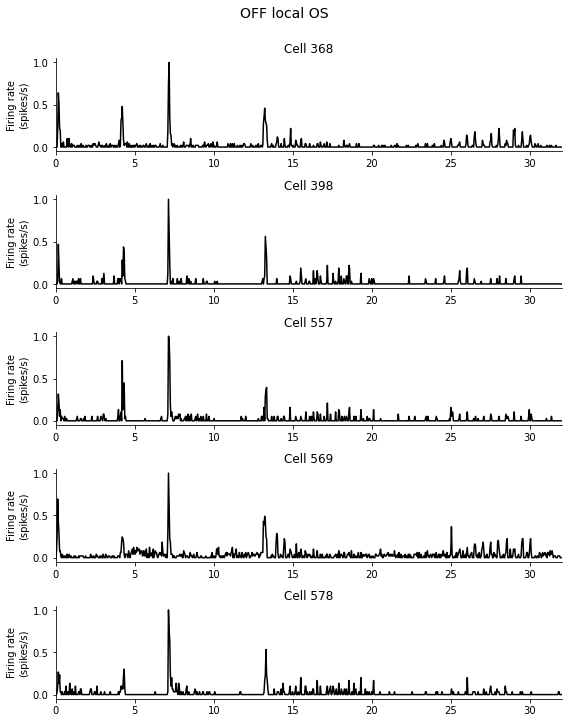

OFF step : [201 281 282 420 424 454 462 482 562 583 880]


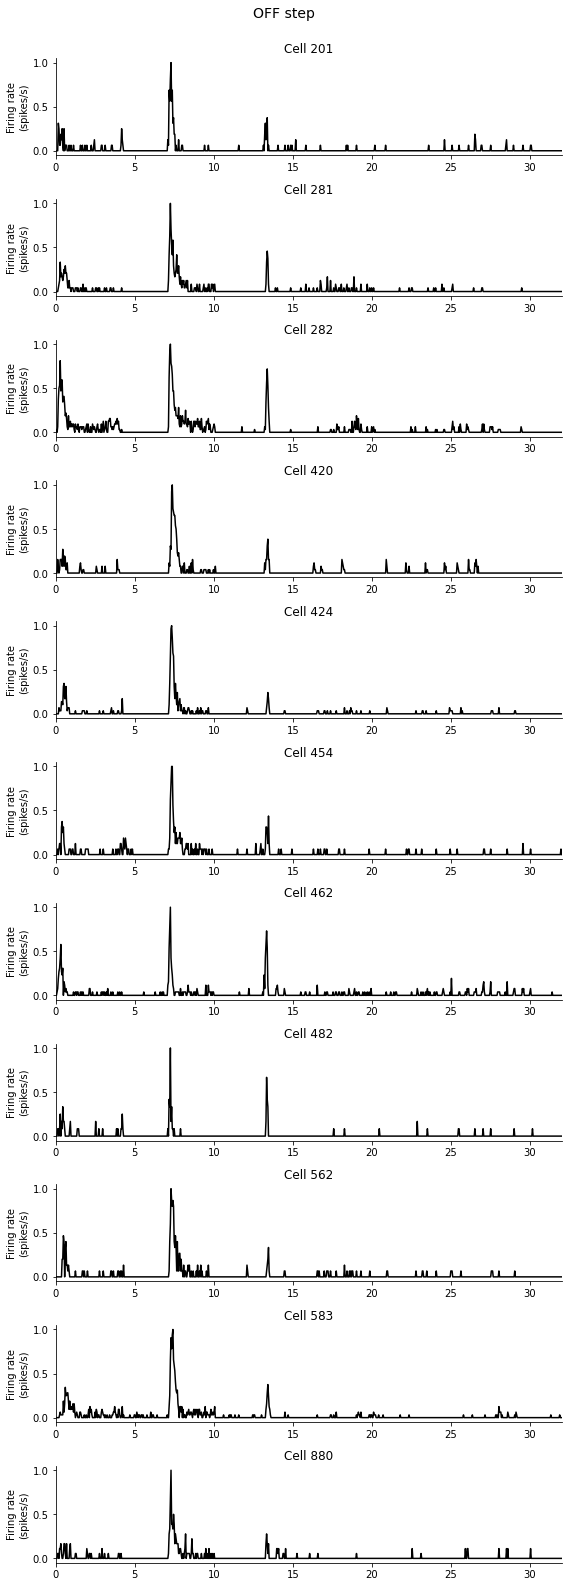

OFF alpha sustained : [ 96 330 550 642 733 741]


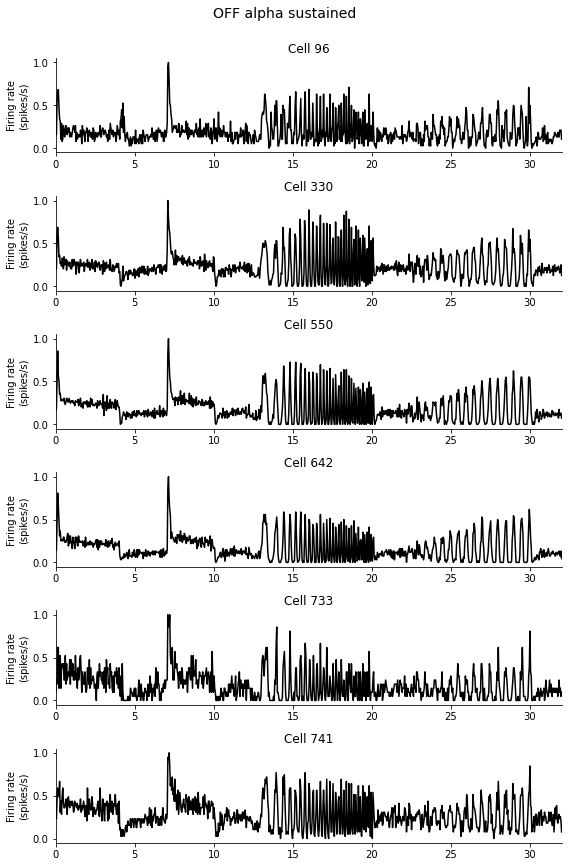

OFF alpha transient : [272 508 765]


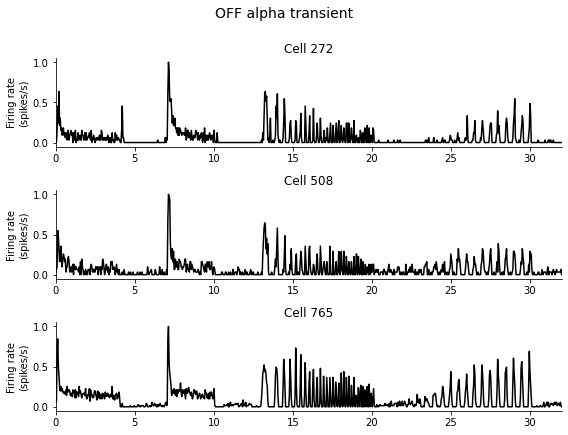

ON-OFF local-edge W3 : [345 829]


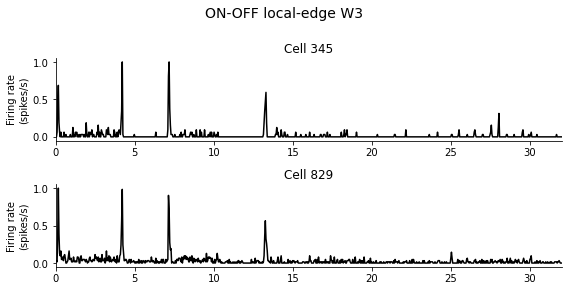

ON-OFF local : [798 975]


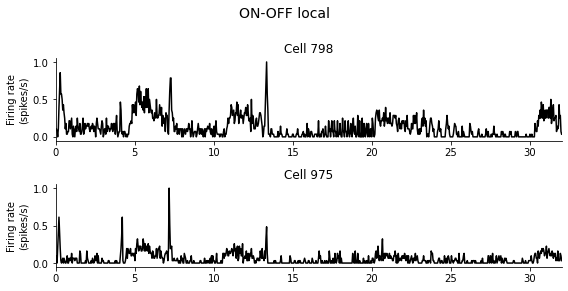

ON-OFF DS 1 : [  13   89  141  233  943  962  990 1039]


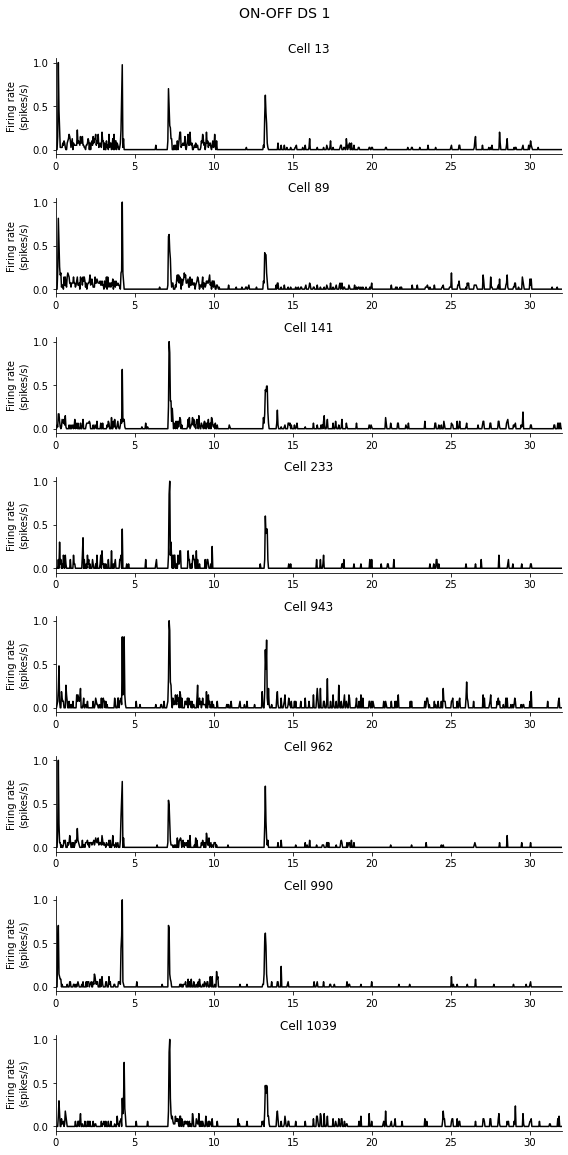

ON-OFF DS 2 : [ 255  308 1018]


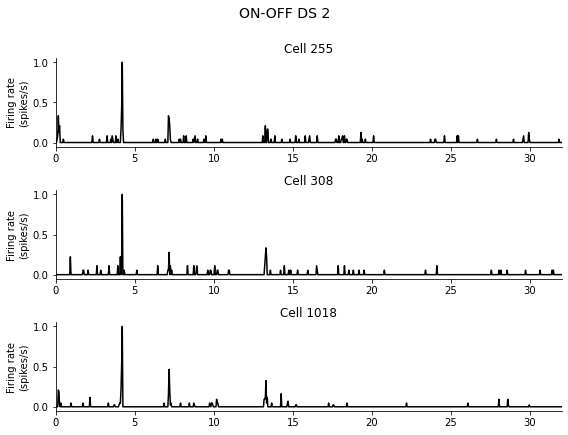

ON step : [152 326 389 425 947]


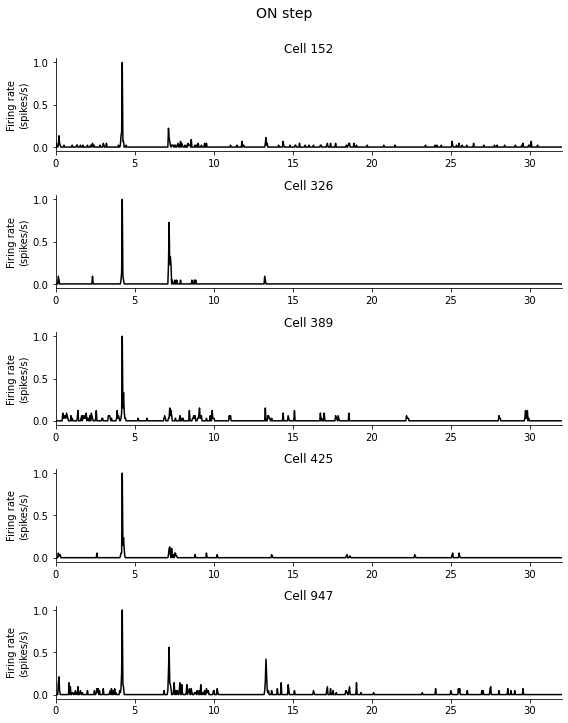

ON local transient OS : [284 406]


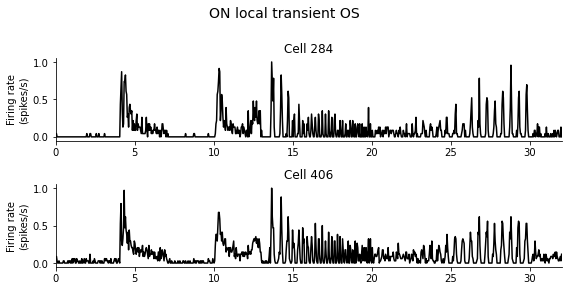

ON transient : [248 404]


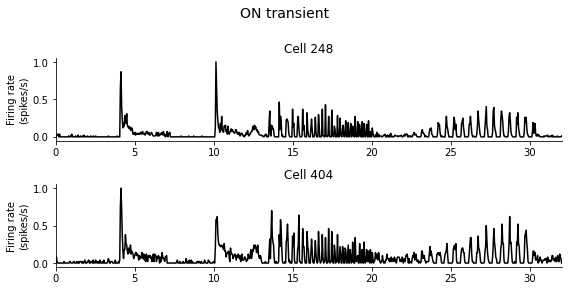

ON high frequency : [900 982]


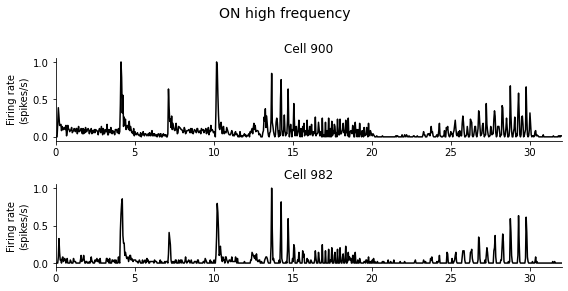

ON low frequency : [  8 218 230 469]


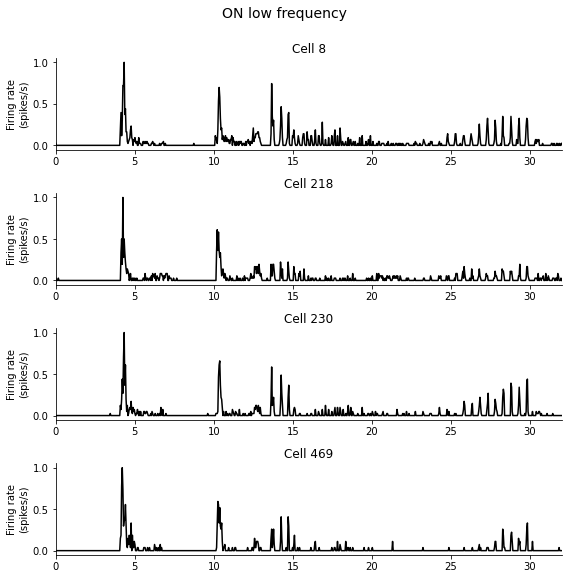

ON mini alpha : [117 240]


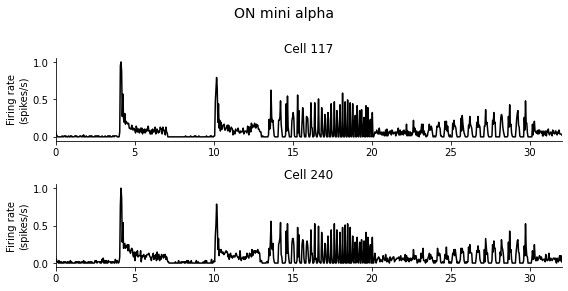

ON alpha : [215 273 356 498 585 596 598 600 609 620 657 700 704 719 744 759]


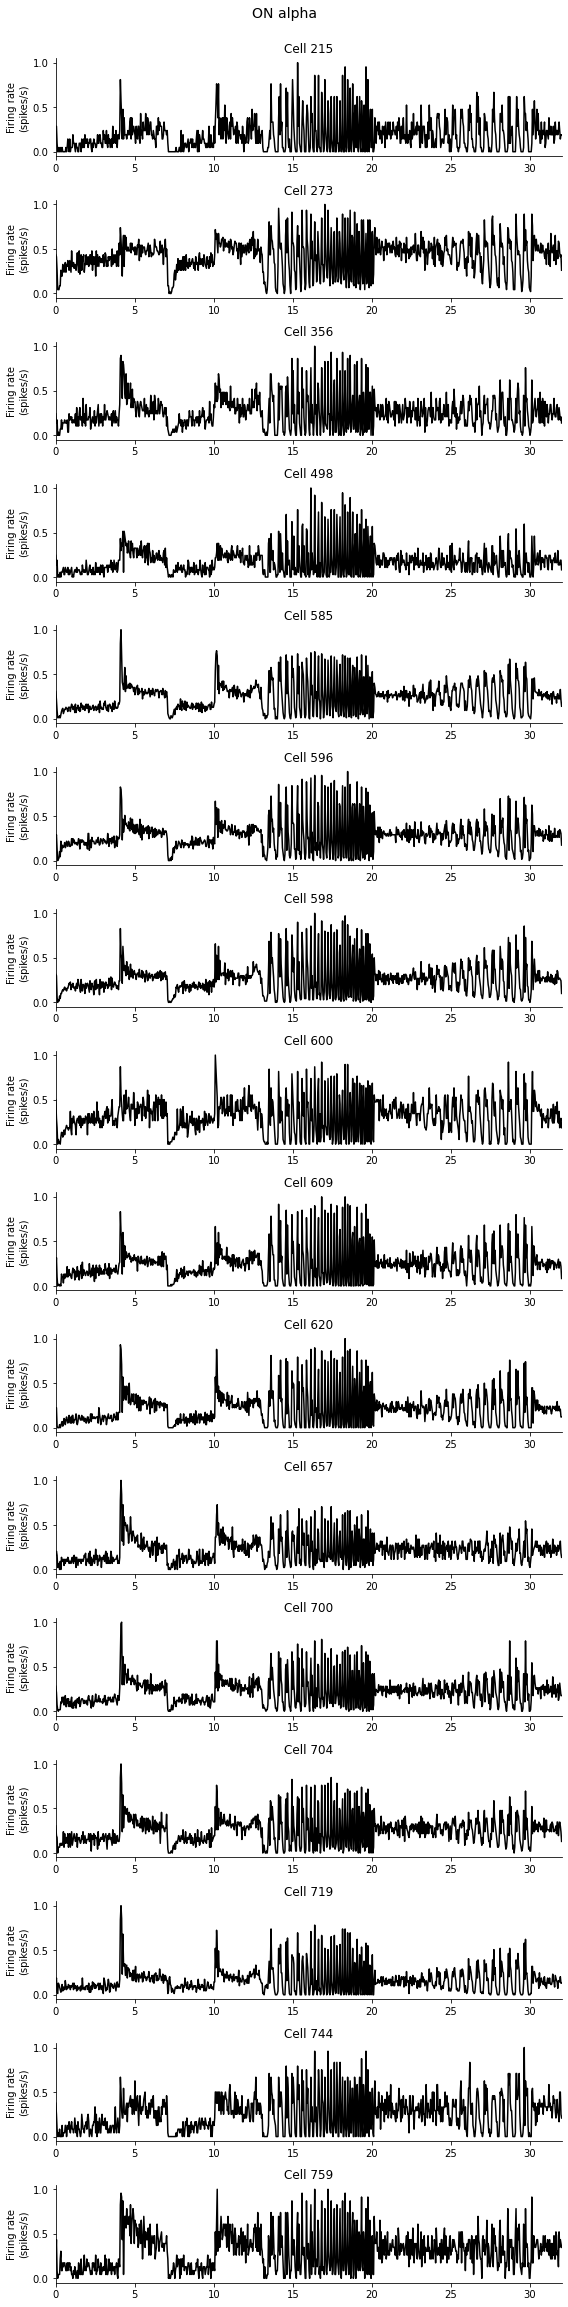

ON DS sustained 1 : [169 301 590 777 791]


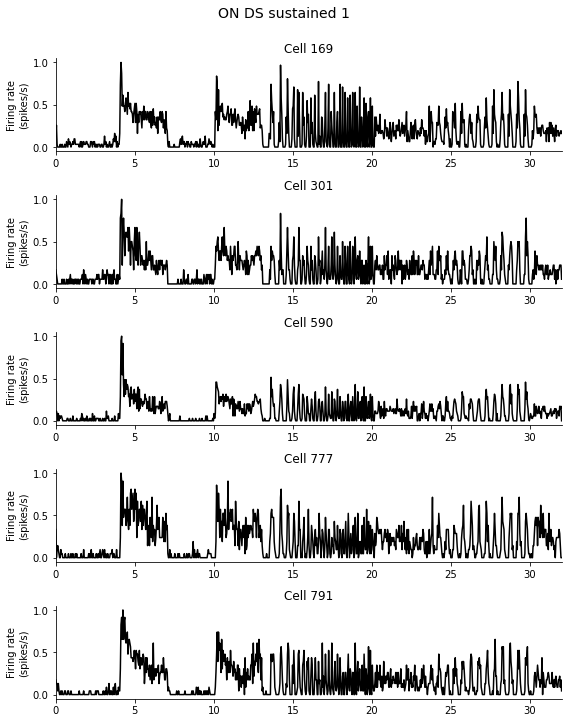

ON DS sustained 2 : [394 856 929]


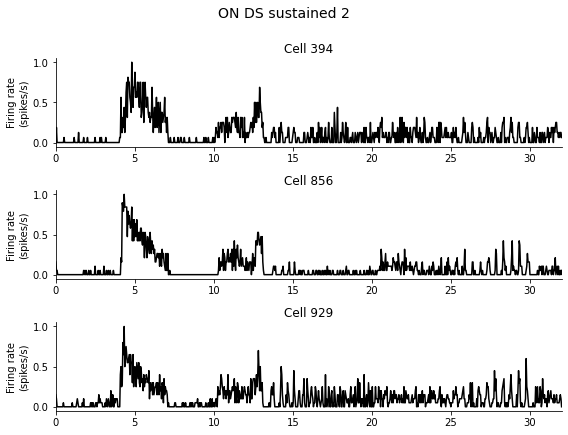

ON slow : [  5 689]


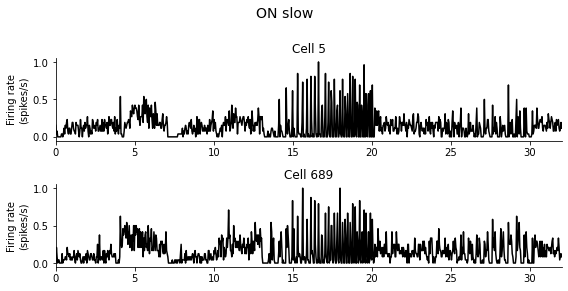

ON constrast suppression : [ 47 160 274 396 558 571 921]


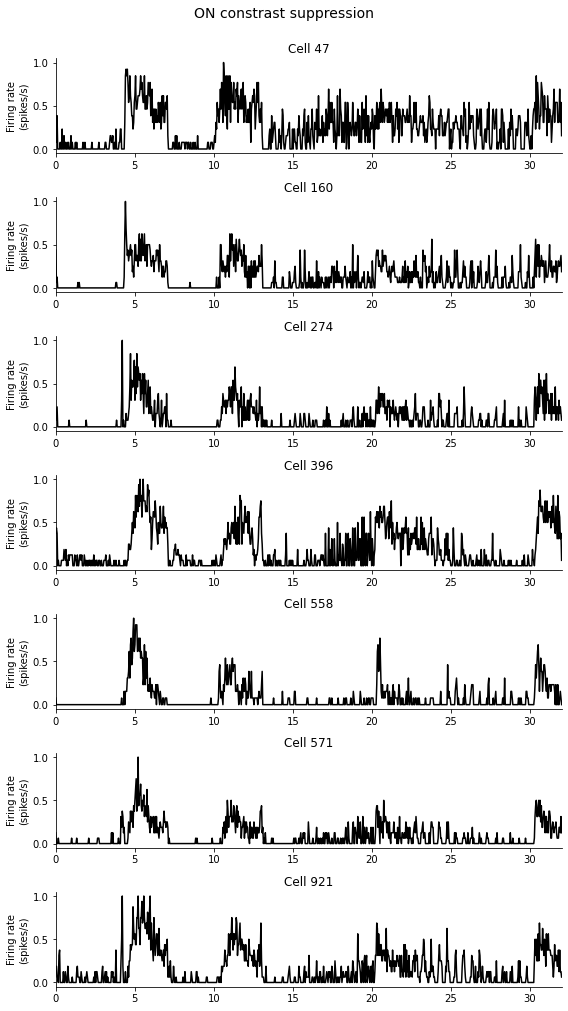

ON DS sustained 3 : [  18  137  451  565  951 1005]


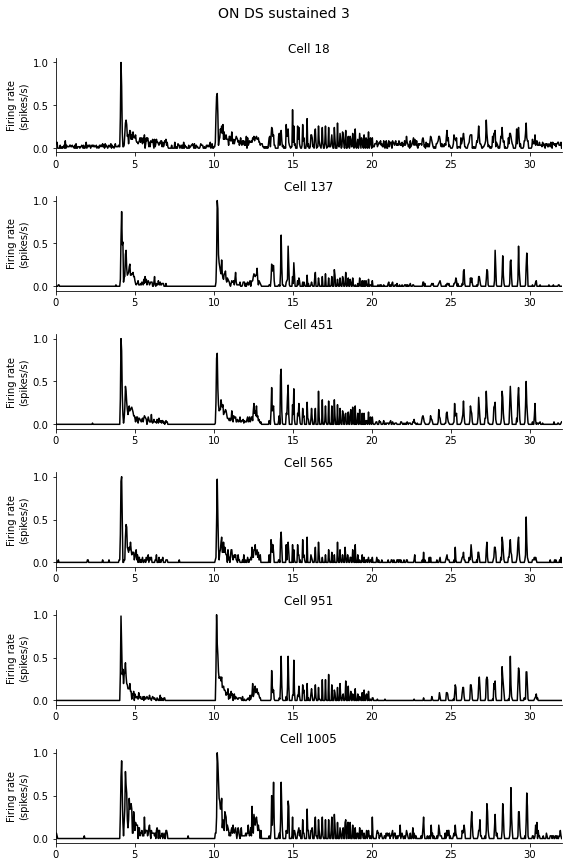

OFF suppression 1 : [311 970]


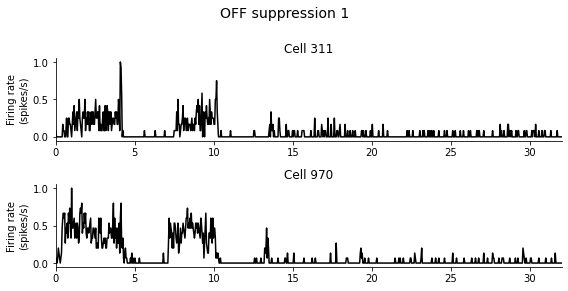

OFF suppression 2 : [271 347 580 937]


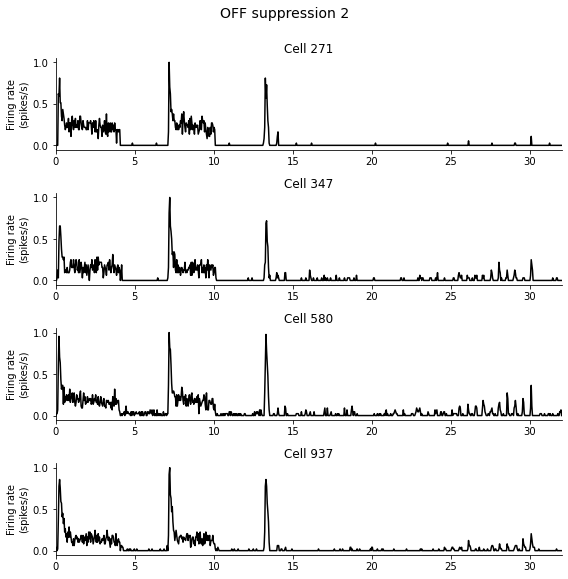

In [30]:
for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types_cleaned == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(8, 2.5))
        else:
            fig = plt.figure(figsize=(8, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 1)

        for i, cell_nb in enumerate(selected_cells):

            psth = cell_data[str(cell_nb)]['psth']
            
            ax = fig.add_subplot(GS[i])
            ax.plot(np.linspace(0,32,800), psth/amax(psth), 'k')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
        
        plt.tight_layout()
        plt.show()

In [31]:
# Save cleaned Baden type for each cell in 'selected_cells'
fsave = exp_path + str(exp) + '_celltype_Baden_cleaned'
save_obj(cell_types_cleaned,fsave)

# fsave = exp_path + str(exp) + '_types_cleaned'
# save_obj(euler_labels_cleaning,fsave)